<a href="https://colab.research.google.com/github/mhaletoki/MA22C025_2023_PL/blob/main/Assignments/Assignment_7/Predator_PreyModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

**Plot
the solution for r(0)=5 and x(0)=2 in 0 ≤ t ≤ 70**

In [2]:
def func(t, y, alpha, beta, delta, gamma):
    r, x = y
    drdt = alpha * r - beta * r * x
    dxdt = delta * r * x - gamma * x
    return [drdt, dxdt]

In [19]:
alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.1
r0 = 5
x0 = 2
t_span = (0, 70)
t_eval = np.linspace(*t_span, 1000)

In [18]:
solution = solve_ivp(func, t_span, [r0, x0], args=(alpha, beta, delta, gamma), t_eval=t_eval)
r, x = solution.y

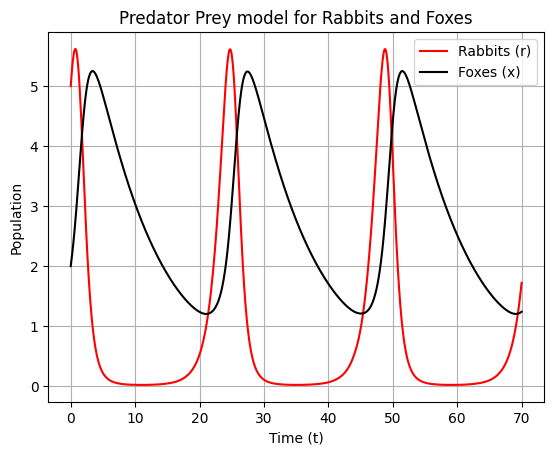

In [5]:

fig = plt.figure()
ax = fig.gca()
ax.plot(t_eval, r, label='Rabbits (r)', color="red")
ax.plot(t_eval, x, label='Foxes (x)', color="black")
ax.set_xlabel('Time (t)')
ax.set_ylabel('Population')
ax.set_title('Predator Prey model for Rabbits and Foxes')
ax.grid()
ax.legend()
plt.show()


**Prepare a figure (phase portrait) with phase plots of 10 solutions, one each for randomly chosen initial values r(0) and x(0) between 1 and 9.**

In [20]:
n= 10#number of initial conditions
min_r = 1
max_r = 9
min_x = 1
max_x = 9
n = 10
initial_conditions = np.random.uniform(min_r, max_r, (n, 1)), np.random.uniform(min_x, max_x, (n, 1))
initial_conditions = np.hstack(initial_conditions) ##converting to numpy array

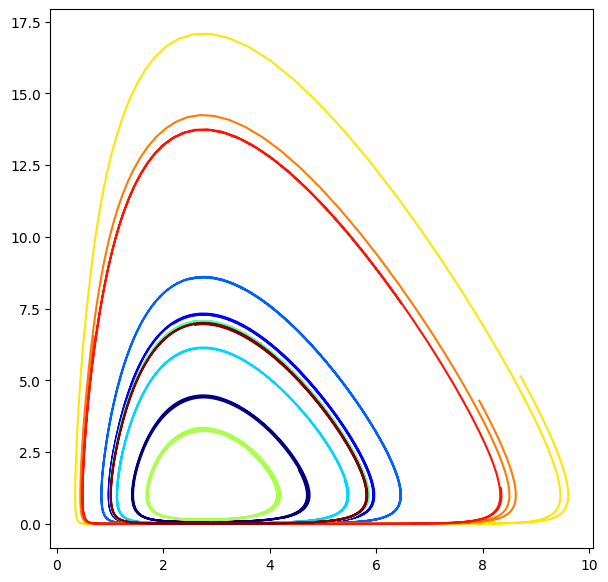

In [16]:
colors = plt.cm.jet(np.linspace(0, 1, n))
plt.figure(figsize=(7, 7))
for i in range(n):
    sol = solve_ivp(func, t_span, initial_conditions[i], args=(alpha, beta, delta, gamma), t_eval=t_eval)
    plt.plot(sol.y[1], sol.y[0], label=f'Trajectory {i + 1}', color=colors[i])

**Solving the equilibria**

In [21]:
r, x = sp.symbols('r x')
drdt = alpha * r - beta * r * x
dxdt = delta * r * x - gamma * x
equilibria = sp.solve([drdt, dxdt], (r, x)) # #solving equilibria

print("Equilibria:")
for eq in equilibria:
    print(f"({eq[0]}, {eq[1]})")

Equilibria:
(0.0, 0.0)
(1.00000000000000, 2.75000000000000)


**Plotting the equilibria**

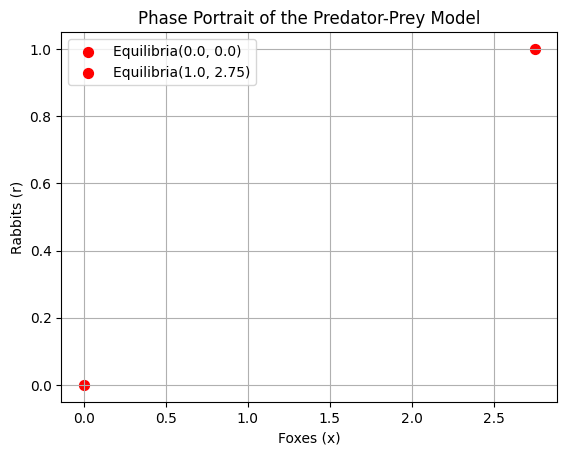

In [14]:
equilibria = [(0.0, 0.0), (1.00000000000000, 2.75000000000000)]
for eq in equilibria:
    plt.scatter(eq[1], eq[0], color='red', marker='o', s=50, label=f'Equilibria{eq}')

plt.xlabel('Foxes (x)')
plt.ylabel('Rabbits (r)')
plt.title('Phase Portrait of the Predator-Prey Model')
plt.legend()
plt.grid()
plt.show()

**Marking the equilibria in the phase portrait**

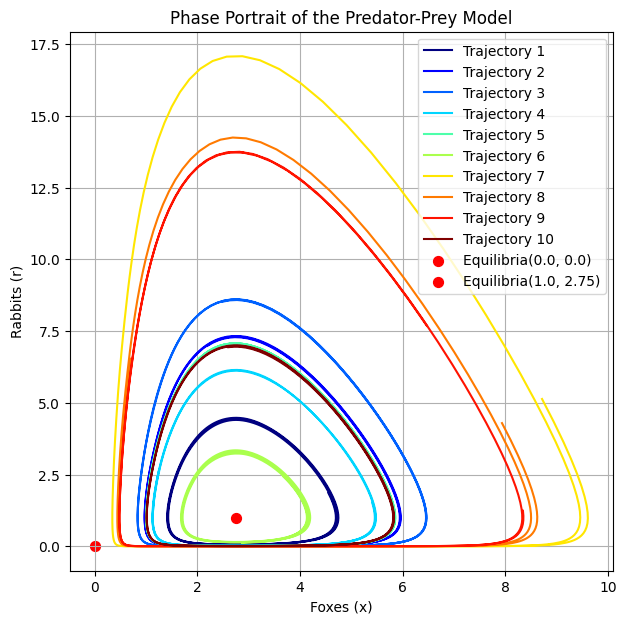

In [15]:
colors = plt.cm.jet(np.linspace(0, 1, n))
plt.figure(figsize=(7, 7))
for i in range(n):
    sol = solve_ivp(func, t_span, initial_conditions[i], args=(alpha, beta, delta, gamma), t_eval=t_eval)
    plt.plot(sol.y[1], sol.y[0], label=f'Trajectory {i + 1}', color=colors[i])
equilibria = [(0.0, 0.0), (1.00000000000000, 2.75000000000000)]
for eq in equilibria:
    plt.scatter(eq[1], eq[0], color='red', marker='o', s=50, label=f'Equilibria{eq}')

plt.xlabel('Foxes (x)')
plt.ylabel('Rabbits (r)')
plt.title('Phase Portrait of the Predator-Prey Model')
plt.legend()
plt.grid()
plt.show()